In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC



In [185]:
# Set maximum number of columns to show
pd.set_option('display.max_columns', None)

# Set maximum width of each column
pd.set_option('display.max_colwidth', None)

# Set the total width of the display (increase as needed)
pd.set_option('display.width', 1000)



In [186]:
import os
file_path = os.path.join(os.getcwd(), 'WineQT.csv')

In [187]:
#import csv file
df = pd.read_csv(file_path)
df = df.drop('Id',axis=1)
#print few few rows of data
print(df.head(10))


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
5            7.4            

In [188]:
#datatype check
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB
None


## Dataset has 1143 rows and 12 variables


In [189]:
#dataframe shape
print(f'DF Shape : \n{df.shape}')

DF Shape : 
(1143, 12)


In [190]:
#Missing value check
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Text(0.5, 1.0, 'Wine Quality Correlation Heatmap')

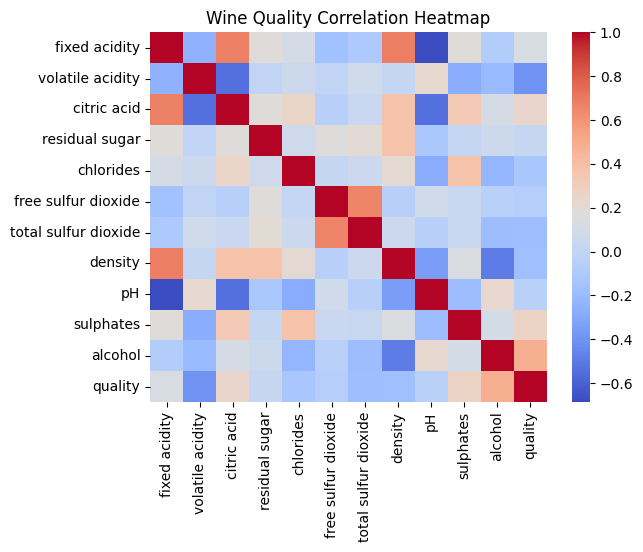

In [191]:
#dataset correlation
Corr = df.corr()
sns.color_palette("crest", as_cmap=True)
sns.heatmap(data = Corr, cmap = 'coolwarm')
plt.title('Wine Quality Correlation Heatmap')

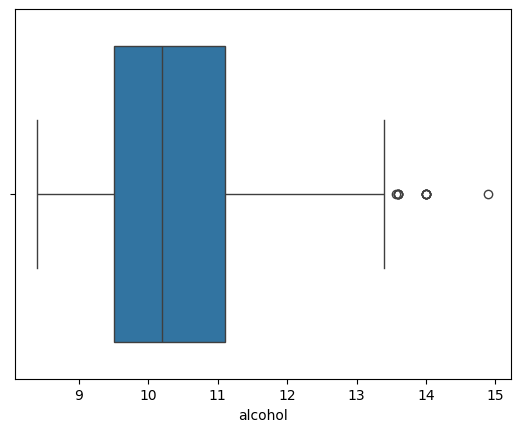

In [192]:
#sns.pairplot(data =df)
sns.boxplot(x= df['alcohol'])
plt.show()


In [193]:
outlier = df[df['alcohol'] >13.5]
print(outlier.shape)


(12, 12)


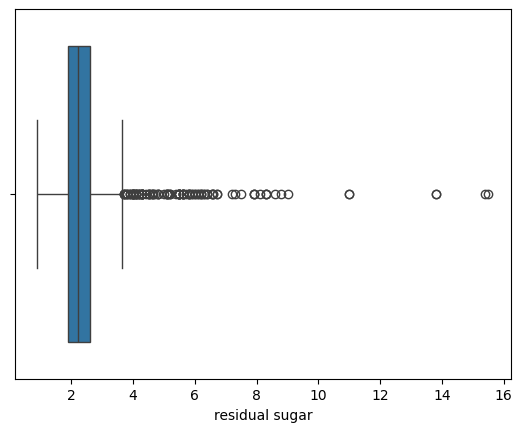

In [194]:
#residual sugar outlier
sns.boxplot(x= df['residual sugar'])
plt.show()

In [195]:
outlier = df[df['residual sugar'] >4]
print(outlier.shape)

(93, 12)


In [196]:
Qual = df.groupby('quality').mean().reset_index()
print(Qual)

   quality  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  sulphates    alcohol
0        3       8.450000          0.897500     0.211667        2.666667   0.105333             8.166667             24.500000  0.997682  3.361667   0.550000   9.691667
1        4       7.809091          0.700000     0.165758        2.566667   0.094788            14.848485             40.606061  0.996669  3.391212   0.637879  10.260606
2        5       8.161077          0.585280     0.240124        2.540476   0.091770            16.612836             55.299172  0.997073  3.302091   0.613375   9.902277
3        6       8.317749          0.504957     0.263680        2.444805   0.085281            15.215368             39.941558  0.996610  3.323788   0.676537  10.655339
4        7       8.851049          0.393671     0.386573        2.760140   0.075217            14.538462             37.489510  0.996071  3.287133   0.7435


header

In [197]:
X = df.drop('quality', axis=1)
y = df['quality']

In [198]:
mi_scores = mutual_info_classif(X, y, discrete_features=False)

In [199]:
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)

In [200]:
print(mi_df)

                 Feature  MI Score
10               alcohol  0.190267
9              sulphates  0.126849
1       volatile acidity  0.086970
6   total sulfur dioxide  0.086285
7                density  0.061817
2            citric acid  0.061441
0          fixed acidity  0.050425
4              chlorides  0.036187
5    free sulfur dioxide  0.027462
8                     pH  0.022923
3         residual sugar  0.015666


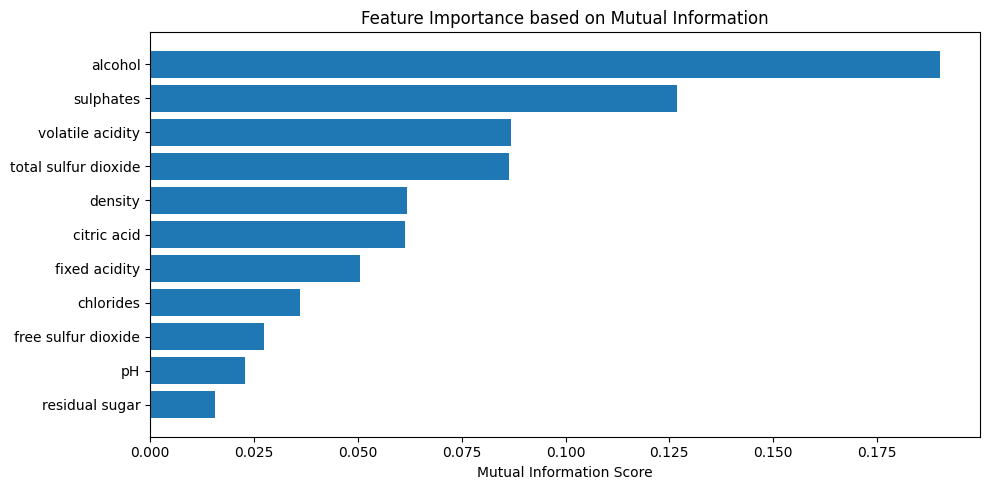

In [201]:
plt.figure(figsize=(10, 5))
plt.barh(mi_df['Feature'], mi_df['MI Score'])
plt.xlabel("Mutual Information Score")
plt.title("Feature Importance based on Mutual Information")
plt.gca().invert_yaxis()  # Highest scores at the top
plt.tight_layout()
plt.show()

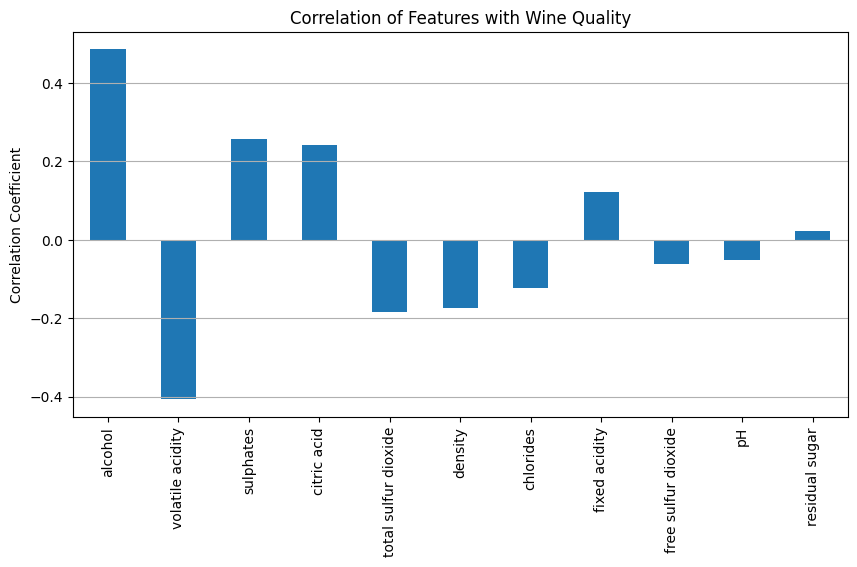

In [202]:
quality_corr = Corr['quality'].drop('quality').sort_values(key=abs, ascending=False)

# Plot as bar chart
plt.figure(figsize=(10, 5))
quality_corr.plot(kind='bar')
plt.title('Correlation of Features with Wine Quality')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y')
plt.show()

In [203]:
quality_corr = Corr['fixed acidity']


print(quality_corr)

fixed acidity           1.000000
volatile acidity       -0.250728
citric acid             0.673157
residual sugar          0.171831
chlorides               0.107889
free sulfur dioxide    -0.164831
total sulfur dioxide   -0.110628
density                 0.681501
pH                     -0.685163
sulphates               0.174592
alcohol                -0.075055
quality                 0.121970
Name: fixed acidity, dtype: float64


# ------------------------------------------------------------------------------
# MIDTERM PROJECT: DATA SCIENCE WITH PYTHON
# ------------------------------------------------------------------------------
#
# 1. PROJECT OVERVIEW AND OBJECTIVES
#
#   1.1 Select a Dataset
#       - Requirement: Choose a dataset not used in class. 
#         It can come from public data repositories (e.g., Kaggle, 
#         UCI Machine Learning Repository, government portals).
#       - Tip: Pick a dataset that interests your group and has 
#         enough complexity to warrant cleaning, EDA, and modeling.
#
#   1.2 Primary Goal                                                                    Noel 
#       - Apply data science concepts—data cleaning, visualization, modeling,
#         and evaluation—to gain insights and showcase Python proficiency.
#
# ------------------------------------------------------------------------------
# 2. PROJECT TASKS IN DETAIL
# ------------------------------------------------------------------------------
#
# 2.1 Acquire, Clean, and Preprocess Data
#
#   (a) Data Acquisition
#       - Identify your data source: file-based (CSV, JSON), database, API, etc.
#       - Document how you obtained it. For example, if from an API, show the request.
#
#   (b) Data Cleaning
#       - Tasks: Handle missing values, remove duplicates, correct invalid entries.
#       - Python Tools: pandas methods (isnull, dropna, fillna, etc.).
#       - Tips: Always justify your decisions, e.g., why dropping vs. imputing missing values.
#
#   (c) Data Preprocessing
#       - Requirement: Use at least 2 preprocessing techniques 
#         (scaling, encoding, feature engineering, etc.).
#       - Tips: Ensure numeric vs. categorical variables are appropriately transformed.
#
# ------------------------------------------------------------------------------
# 2.2 Perform Exploratory Data Analysis (EDA) and Visualize Key Insights
#
#   (a) Exploratory Data Analysis                                                       Enrique and Laura   
#       - Compute basic stats (mean, median, std, etc.).
#       - Identify correlations, outliers, or data imbalances.
#       - Use pandas describe(), info(), corr() for an overview.
#
#   (b) Data Visualization                                                              Laura and Enrique 
#       - Requirement: At least 3 different visualization techniques (histogram, 
#         scatter plot, box plot, heatmap, etc.).
#       - Tips: Use clear labels, titles, and legends. Let visuals drive your EDA narrative.
#
# ------------------------------------------------------------------------------
# 2.3 Build and Evaluate a Machine Learning Model
#
#   (a) Model Building                                                                  Noel and Phat
#       - Requirement: At least 2 different ML algorithms 
#         (e.g., Logistic Regression, Random Forest, Linear Regression, etc.).
#       - Tips: Match the algorithm type to your target variable 
#         (classification vs. regression).
#
#   (b) Model Evaluation                                                                Noel and Phat
#       - Requirement: At least 2 different evaluation metrics 
#         (accuracy, precision/recall, F1, RMSE, MAE, etc.).
#       - Tips: Present numeric results and interpret them in plain English. 
#         Consider basic hyperparameter tuning.
#
# ------------------------------------------------------------------------------
# 3. DELIVERABLES
# ------------------------------------------------------------------------------
#
#   3.1 Code                                                                Phat- Completed
#       - A well-commented Python script or Jupyter Notebook with:
#         * Data acquisition, cleaning, preprocessing                       Noel
#         * EDA and visualizations                                          Laura and Enrique will add more 
#         * Model building, training, and evaluation                        Phat and Noel 
#       - Ensure reproducibility. Include data or instructions to access it.
#
#   3.2 Report (Due in 3 Weeks)                                             Danila create document
#       - Structure:
#         1) Introduction to the Dataset
#         2) Data Cleaning & Preprocessing Steps
#         3) EDA & Key Insights
#         4) Model Building & Evaluation
#         5) Conclusion
#         6) References (if any)
#
# ------------------------------------------------------------------------------
# 4. TEAM COLLABORATION AND SUBMISSION TIPS
# ------------------------------------------------------------------------------
#
#   (a) Group Roles
#       - Decide early who focuses on which aspect: data cleaning, modeling, etc.
#       - Use Git or a similar VCS to merge changes and maintain a single codebase.
#
#   (b) Progress Milestones
#       - Week 1: Finalize dataset, do initial cleaning and EDA.
#       - Week 2: Refine preprocessing, build and evaluate at least one model.
#       - Week 3: Complete second model, finalize visualizations, write report.
#
#   (c) Version Control
#       - Commit frequently, use branches for different tasks, review each other's code.
#
#   (d) Polish and Professionalism
#       - Keep code readable and well-structured (clear variable names, function docstrings).
#       - Proofread your report, ensure visualizations are well-labeled.
#
# ------------------------------------------------------------------------------
# 5. PUTTING IT ALL TOGETHER
# ------------------------------------------------------------------------------
#
# By following this guide, your group will:
#   - Acquire data from a new source and thoroughly clean it.
#   - Preprocess it (e.g., scaling, encoding, feature engineering) as needed.
#   - Conduct an informative EDA with multiple visualizations.
#   - Train at least two machine learning models, evaluate them with multiple metrics.
#   - Compile findings in a concise, well-organized final report.
#
# Good luck with your data exploration and modeling!
# ------------------------------------------------------------------------------

In [204]:
df_balanced = df[(df['quality']==5) | (df['quality']==6) ]

In [205]:
print(df.groupby('quality').size())
print(df_balanced.groupby('quality').size())

quality
3      6
4     33
5    483
6    462
7    143
8     16
dtype: int64
quality
5    483
6    462
dtype: int64


In [206]:
X_balanced = df_balanced.drop('quality', axis=1)
y_balanced = df_balanced['quality']

In [207]:
#Logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

In [208]:
model = LogisticRegression( solver='lbfgs')
model.fit(X_train, y_train)

c:\Users\vochi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [209]:
y_pred = model.predict(X_test)

In [217]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")

ValueError: pos_label=1 is not a valid label. It should be one of [5, 6]

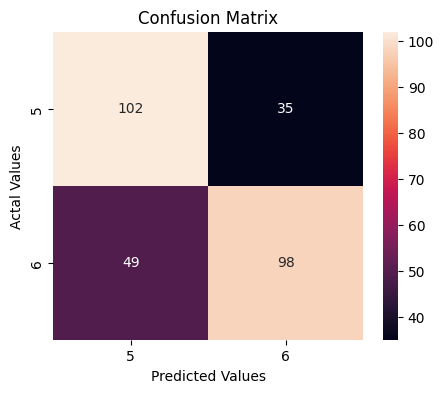

In [211]:
lables = [5,6]
cm = confusion_matrix(y_test,y_pred, labels= lables)

cm_df = pd.DataFrame(cm, index = [5,6],
                     columns = [5,6])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot= True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [212]:
print(cm)

[[102  35]
 [ 49  98]]


#support ventor machine
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

lables = [5,6]
cm = confusion_matrix(y_test,y_pred, labels= lables)

cm_df = pd.DataFrame(cm, index = [5,6],
                     columns = [5,6])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot= True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Example pipeline: scaling + logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))  # 'liblinear' works with l1/l2
])

# Define the grid of C values to search
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],     # Try more/finer values if needed
    'logreg__penalty': ['l1', 'l2']                  # Optional: test both regularization types
}

# Set up GridSearch
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best result
print("Best C:", grid.best_params_['logreg__C'])
print("Best Penalty:", grid.best_params_['logreg__penalty'])
print("Best CV Accuracy:", grid.best_score_)

Best C: 0.1
Best Penalty: l2
Best CV Accuracy: 0.7337776258828891
